In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

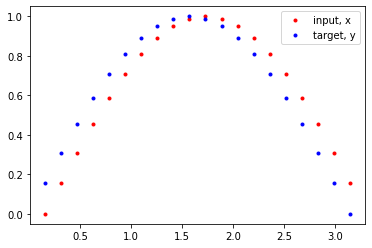

In [5]:
#여기서는 그냥input size긴한데 보통 단어 개수같은거의미한다 
seq_length =20

time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) #차원늘리기

x=data[:-1]
y=data[1:]

plt.plot(time_steps[1:], x, 'r.', label='input, x') # x 빨간색
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y 파란색

plt.legend(loc='best')
plt.show()

In [6]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim

        
        # batch_first 첫번째 차원을  batch_size로 받는다 (batch_size, seq_length, hidden_dim)
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        #  fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        #  RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # 아웃풋 모양 (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        #  final output 
        output = self.fc(r_out)
        
        return output, hidden


In [7]:
#모델 차원이 원하는 모양인지 확인해보기

test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))
# unsqueeze(0) 괄호안에 위치에 차원을 하나삽입한다
# 모양이 [2,3] 인 tensor에 unsqueeze(0)하면 [1,2,3]
# unsqueeze(2)를 하면 [2,3,1] 이렇게 차원이 늘어남
test_input = torch.Tensor(data).unsqueeze(0) 
print('Input size: ', test_input.size())

# none 처음 히든스테이츠설정
#[1,20,1] =[batch_size,seq_length,input_size] test_rnn에서 설정한거
#[20,1] [batch_size랑 seq_length 합쳤으니까,output_size]
#[2,1,10] [n_layers,batch_size,hidden_dim]


test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())



Input size:  torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])
